In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc,accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

In [3]:
iris_data = datasets.load_iris()

In [4]:
X = iris_data.data
y = iris_data.target

In [7]:
df = pd.DataFrame(X, columns=iris_data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a191e9320>,
      dtype=object)

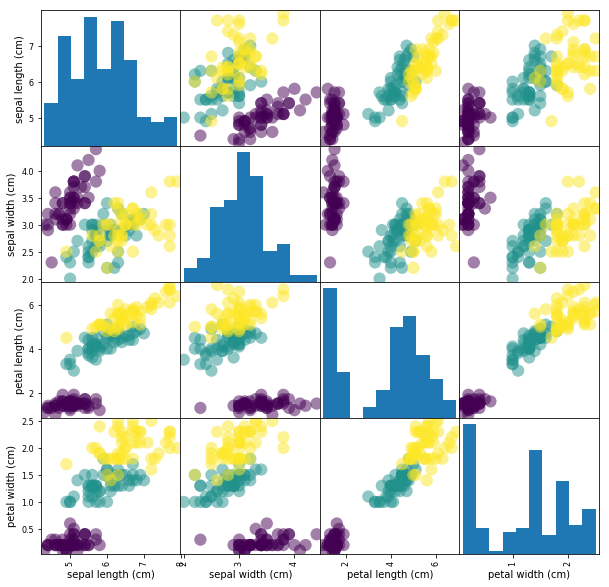

In [9]:
pd.plotting.scatter_matrix(df,c=y,figsize=[10,10],marker='E',s=150)

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=22)

# Build a model

### K-Nearest Neighbors classifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=10)

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [45]:
knn.score(X_train,y_train)

0.9809523809523809

In [46]:
knn.score(X_test,y_test)

0.9111111111111111

In [47]:
y_pred_knn = knn.predict(X_test)

In [109]:
acc_knn = accuracy_score(y_test,y_pred_knn)

In [110]:
print("Classification report :")
print(classification_report(y_test,y_pred_knn))
print("\n")
print("Confusion Matrix :")
print(confusion_matrix(y_test,y_pred_knn))
print("\n")
print("Accuracy score :")
print(accuracy_score(y_test,y_pred_knn))

Classification report :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.83      0.94      0.88        16
          2       0.93      0.81      0.87        16

avg / total       0.92      0.91      0.91        45



Confusion Matrix :
[[13  0  0]
 [ 0 15  1]
 [ 0  3 13]]


Accuracy score :
0.9111111111111111


# Choosing the correct hyperparameter

## GridSearchCV

In [38]:
parameters = {'n_neighbors':range(1,50)}
grid = GridSearchCV(knn, parameters,cv=5)

In [39]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 50)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [40]:
grid.best_params_

{'n_neighbors': 10}

In [41]:
grid.best_score_

0.9904761904761905

In [42]:
grid.score(X_test,y_test)

0.9111111111111111

In [111]:
y_pred_grid = grid.predict(X_test)

In [112]:
acc_grid = accuracy_score(y_test,y_pred_grid)

In [113]:
acc_grid

0.9111111111111111

## MultinomialNB

In [62]:
naive = MultinomialNB()

In [63]:
naive.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
naive.score(X_train,y_train)

0.9619047619047619

In [65]:
naive.score(X_test,y_test)

0.9555555555555556

In [66]:
y_pred_mul = naive.predict(X_test)

In [115]:
acc_mul = accuracy_score(y_test,y_pred_mul)

In [116]:
print("Classification report :")
print(classification_report(y_test,y_pred_mul))
print("\n")
print("Confusion Matrix :")
print(confusion_matrix(y_test,y_pred_mul))
print("\n")
print("Accuracy score :")
print(accuracy_score(y_test,y_pred_mul))

Classification report :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.89      1.00      0.94        16
          2       1.00      0.88      0.93        16

avg / total       0.96      0.96      0.96        45



Confusion Matrix :
[[13  0  0]
 [ 0 16  0]
 [ 0  2 14]]


Accuracy score :
0.9555555555555556


# RandomForestClassifier

In [72]:
rfc = RandomForestClassifier(random_state=1,n_estimators=5)

In [73]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [74]:
rfc.score(X_train,y_train)

0.9904761904761905

In [75]:
rfc.score(X_test,y_test)

0.9111111111111111

In [76]:
y_pred_rfc = naive.predict(X_test)

In [117]:
acc_rfc = accuracy_score(y_test,y_pred_rfc)

In [77]:
print("Classification report :")
print(classification_report(y_test,y_pred_rfc))
print("\n")
print("Confusion Matrix :")
print(confusion_matrix(y_test,y_pred_rfc))
print("\n")
print("Accuracy score :")
print(accuracy_score(y_test,y_pred_rfc))

Classification report :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.89      1.00      0.94        16
          2       1.00      0.88      0.93        16

avg / total       0.96      0.96      0.96        45



Confusion Matrix :
[[13  0  0]
 [ 0 16  0]
 [ 0  2 14]]


Accuracy score :
0.9555555555555556


# Using Neural Network

In [78]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [79]:
model = Sequential()

In [98]:
model.add(Dense(100,activation='relu',input_shape=(4,)))
# model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [99]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)
y_cat_train.shape

(105, 3)

In [100]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [103]:
model.fit(X_train,y_cat_train,epochs=100)

Epoch 1/100
105/105 [==============================] - 0s 224us/step - loss: 0.4171 - acc: 0.8000
Epoch 2/100
105/105 [==============================] - 0s 241us/step - loss: 0.4159 - acc: 0.7714
Epoch 3/100
105/105 [==============================] - 0s 260us/step - loss: 0.3785 - acc: 0.8381
Epoch 4/100
105/105 [==============================] - 0s 284us/step - loss: 0.3650 - acc: 0.8381
Epoch 5/100
105/105 [==============================] - 0s 247us/step - loss: 0.3947 - acc: 0.7810
Epoch 6/100
105/105 [==============================] - 0s 230us/step - loss: 0.4925 - acc: 0.8381
Epoch 7/100
105/105 [==============================] - 0s 267us/step - loss: 0.3501 - acc: 0.8476
Epoch 8/100
105/105 [==============================] - 0s 237us/step - loss: 0.3747 - acc: 0.8571
Epoch 9/100
105/105 [==============================] - 0s 261us/step - loss: 0.3927 - acc: 0.8286
Epoch 10/100
105/105 [==============================] - 0s 243us/step - loss: 0.3565 - acc: 0.8667
Epoch 11/100
105/10

105/105 [==============================] - 0s 236us/step - loss: 0.1401 - acc: 0.9524
Epoch 84/100
105/105 [==============================] - 0s 246us/step - loss: 0.0986 - acc: 0.9619
Epoch 85/100
105/105 [==============================] - 0s 226us/step - loss: 0.1023 - acc: 0.9619
Epoch 86/100
105/105 [==============================] - 0s 227us/step - loss: 0.1447 - acc: 0.9429
Epoch 87/100
105/105 [==============================] - 0s 223us/step - loss: 0.1431 - acc: 0.9524
Epoch 88/100
105/105 [==============================] - 0s 242us/step - loss: 0.1218 - acc: 0.9524
Epoch 89/100
105/105 [==============================] - 0s 238us/step - loss: 0.0848 - acc: 0.9619
Epoch 90/100
105/105 [==============================] - 0s 227us/step - loss: 0.1454 - acc: 0.9333
Epoch 91/100
105/105 [==============================] - 0s 235us/step - loss: 0.0901 - acc: 0.9619
Epoch 92/100
105/105 [==============================] - 0s 228us/step - loss: 0.1181 - acc: 0.9619
Epoch 93/100
105/105 [=

In [104]:
y_pred_nn = model.predict(X_test).argmax(1)

In [105]:
y_pred_nn

array([0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0,
       1])

In [108]:
count = 0
for i in range(len(y_pred_nn)):
    if y_test[i] == y_pred_nn[i]:
        count += 1
print(count)
print("Accuracy :", count/len(y_pred_nn))

45
Accuracy : 1.0


In [118]:
acc_nn = count/len(y_pred_nn)

In [ ]:
models = pd.DataFrame({
    'Model': ['KNeighborsClassifier', 'GridSearchCv', 'RandomForest','Naive Bayes', 'Neural Network', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)